# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user  --no-warn-script-location

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# libaries for data manipulation & visualization
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# libaries for building the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
Loan = pd.read_csv('Loan_Modelling.csv')   

In [4]:
df = Loan.copy()

## Data Overview

* Observations
* Sanity checks

In [5]:
pd.concat([df.head(), df.tail()])

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.shape

(5000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [11]:
df.skew()

ID                    0.000000
Age                  -0.029341
Experience           -0.026325
Income                0.841339
ZIPCode              -0.296165
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal_Loan         2.743607
Securities_Account    2.588268
CD_Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

---
##### Observations
- There are 5000 rows, and 14 columns which include 1 ID column.
- The data types are all numerical, int & float.
- There are no missing values and no duplicates in the data set.
- The following features only contain boolean values 0 and 1: Personal_Loan, Securities_Account, CD_Account, Online, CreditCard.
- The average for Age is 45, for Experience is 20, for Income is 73k, and etc.
- Income, CCAvg, and Mortgage have right skewed data distribution.
---

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [12]:
#function to find outliers using IQR
def find_outliers(feature):
   q1=df[feature].quantile(0.25)
   q3=df[feature].quantile(0.75)
   IQR=q3-q1
   return df[((df[feature]<(q1-1.5*IQR)) | (df[feature]>(q3+1.5*IQR)))]

#### Univariate Analysis

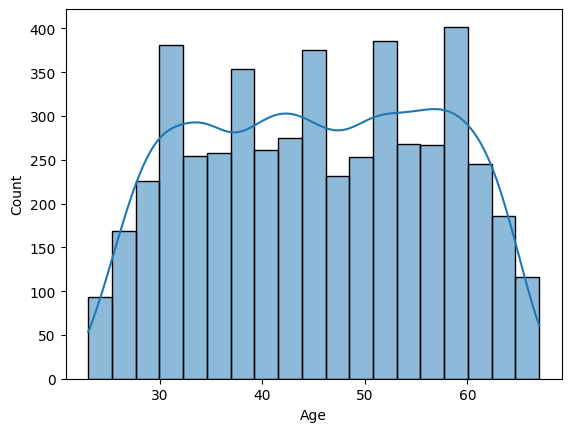

In [13]:
sns.histplot(data=df, x='Age', kde=True);

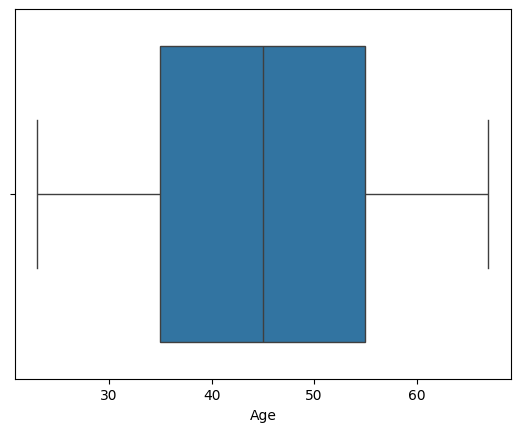

In [14]:
sns.boxplot(data=df, x='Age');

---
##### Observations (Age Column):
- The data set is normally distributed and there is no outlier.
- The average age is 45.
---

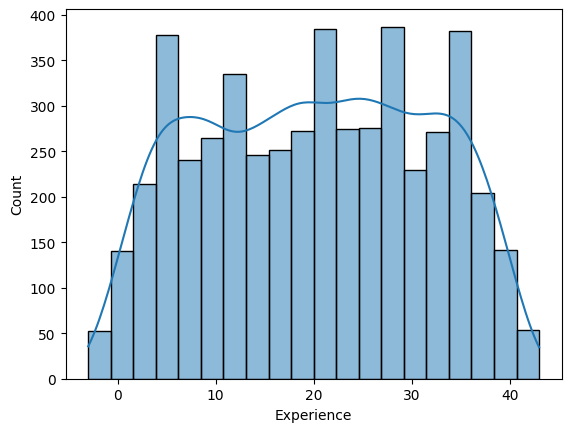

In [15]:
sns.histplot(data=df, x='Experience', kde=True);


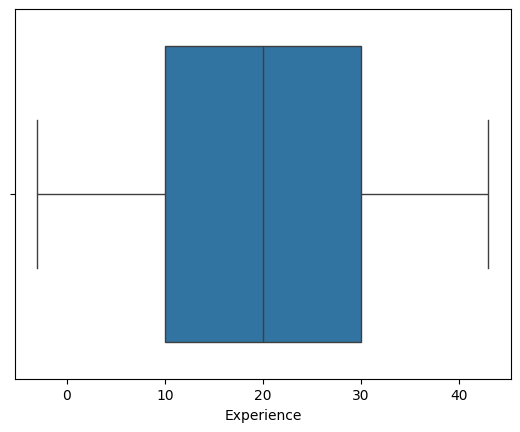

In [16]:
sns.boxplot(data=df, x='Experience');

In [17]:
print(f'Number of rows with negative values: {(df.Experience < 0).sum().sum()} \
\nThe lowest value is {df.Experience.min(axis=0)} ')

Number of rows with negative values: 52 
The lowest value is -3 


---
##### Observations (Experience Column):
- The data distribution is symmetric and there is no outlier.
- The average years of professional experience are 20.
- There are 52 rows with negative values.
---

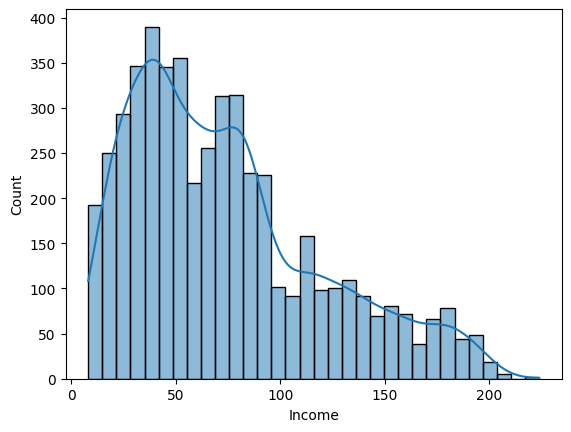

In [18]:
sns.histplot(data=df, x='Income', kde=True);

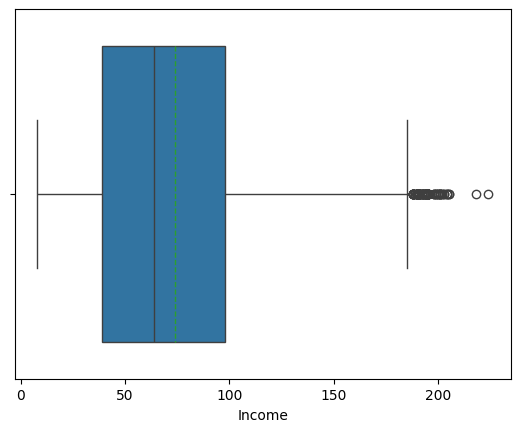

In [19]:
sns.boxplot(data=df, x='Income', showmeans=True, meanline=True);

In [20]:
outliers = find_outliers('Income')
pd.concat([outliers.sort_values(by='Income', ascending=False).head(),outliers.sort_values(by='Income', ascending=False).tail()])

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3896,3897,48,24,224,93940,2,6.67,1,0,0,0,1,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
526,527,26,2,205,93106,1,6.33,1,271,0,0,0,0,1
2988,2989,46,21,205,95762,2,8.80,1,181,0,1,0,1,0
4225,4226,43,18,204,91902,2,8.80,1,0,0,0,0,1,0
3943,3944,61,36,188,91360,1,9.30,2,0,1,0,0,0,0
4309,4310,34,8,188,94025,1,2.90,3,0,1,0,0,1,0
1719,1720,36,12,188,91304,2,6.50,1,0,0,0,0,1,1
1097,1098,50,24,188,92007,3,1.30,1,184,1,0,0,0,1
3821,3822,35,9,188,92220,2,3.70,2,259,1,0,0,1,0


In [21]:
outliers.shape

(96, 14)

---
##### Observations (Income Column):
- The average income is 73k and the median income is 64k.
- The data distribution is right skewed and there are 96 outliers in the range from 188k to 224k.
---

In [22]:
df['ZIPCode'].mode()

0    94720
Name: ZIPCode, dtype: int64

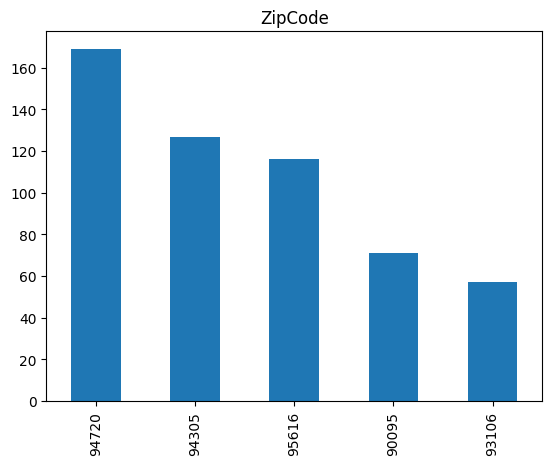

In [23]:
df['ZIPCode'].value_counts().head().plot(kind='bar', title='ZipCode');

---
##### Observations (ZIPCode Column):
- The most frequent zipcode is 94720 which is city of Berkeley CA and has 169 rows.
---

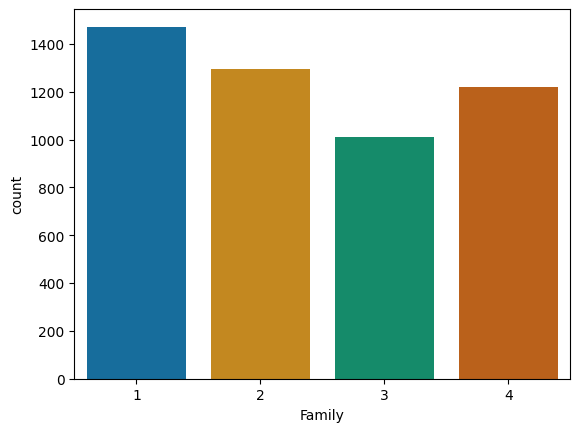

In [24]:
sns.countplot(data=df, x='Family', palette='colorblind');

---
##### Observations (Family Column):
- The single (Family of 1) category is the most common family size.
---

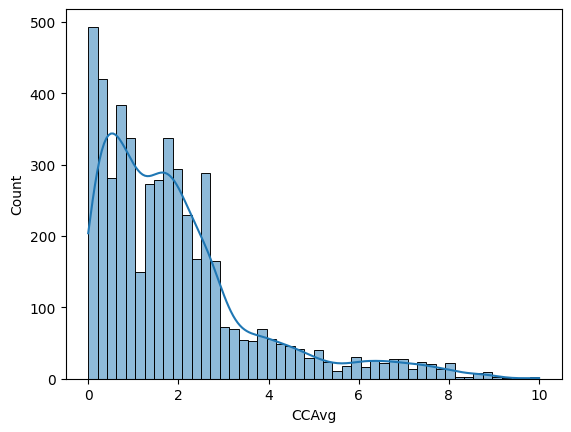

In [25]:
sns.histplot(data=df, x='CCAvg', kde=True);

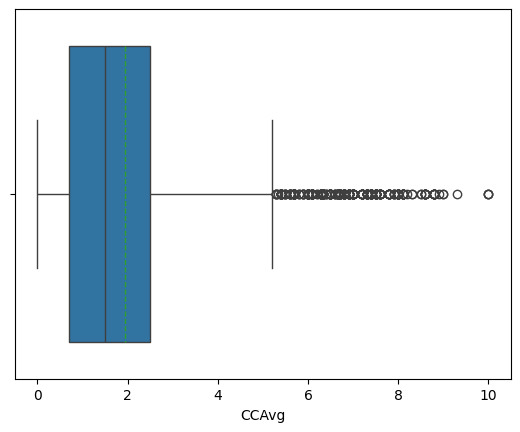

In [26]:
sns.boxplot(data=df, x='CCAvg', showmeans=True, meanline=True);

In [27]:
outliers = find_outliers('CCAvg')
outliers.sort_values(by='CCAvg', ascending=False).head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2337,2338,43,16,201,95054,1,10.0,2,0,1,0,0,0,1
787,788,45,15,202,91380,3,10.0,3,0,1,0,0,0,0
2101,2102,35,5,203,95032,1,10.0,3,0,1,0,0,0,0
3943,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0
3822,3823,63,33,178,91768,4,9.0,3,0,1,0,0,0,0


In [28]:
outliers.shape

(324, 14)

---
##### Observations (CCAvg Column):
- The average spending on credit cards per month is close to \\$2k.
- The data distribution is right skewed and there are 324 outliers in the range of \\$5.2k to $10k.
  
---

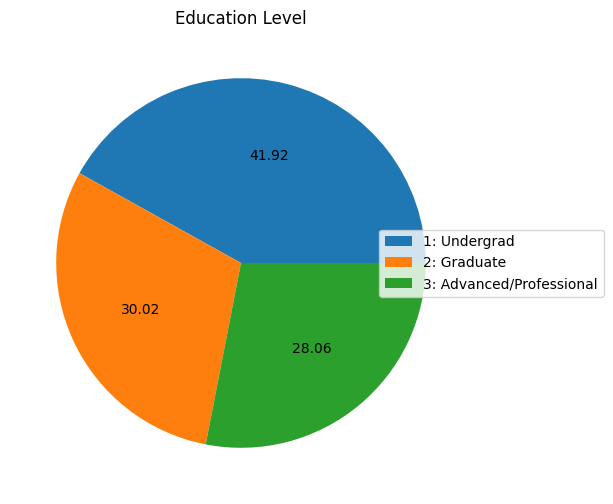

In [29]:
ax = df['Education'].value_counts().plot(kind='pie', figsize=(6,6),  labeldistance=None, legend=True,  \
                  autopct=lambda p: format(p, '.2f') if p > 10 else None)
plt.legend(bbox_to_anchor=(1.3,0.5), loc='center right', labels = ['1: Undergrad', '2: Graduate', '3: Advanced/Professional'])
plt.title('Education Level')
plt. ylabel('');

---
##### Observations (Education Column):
- The Undergrad has the highest percentage at about 42%, followed by Graduate at 30%, and Professional at 28%. 
---

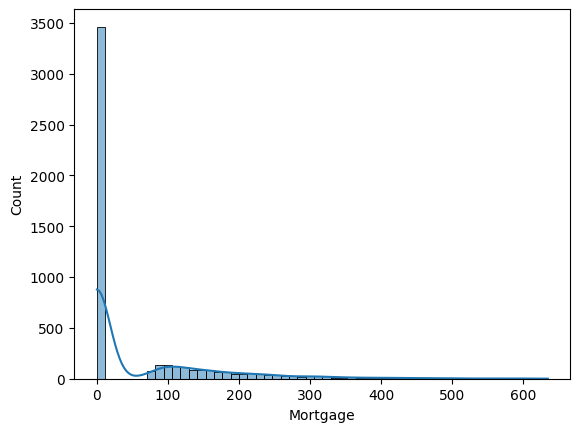

In [30]:
sns.histplot(data=df, x='Mortgage', kde=True);

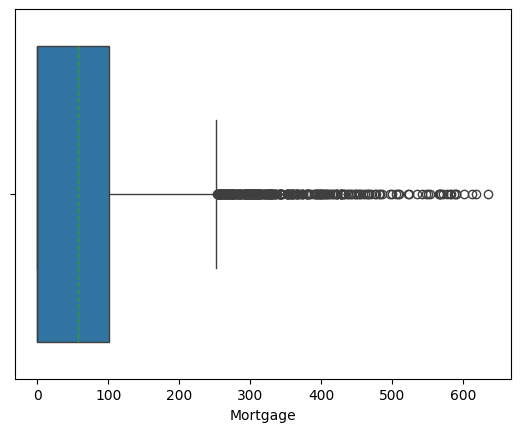

In [31]:
sns.boxplot(data=df, x='Mortgage', showmeans=True, meanline=True);

In [32]:
df['Mortgage'].median()

0.0

In [33]:
outliers = find_outliers('Mortgage')
outliers.sort_values(by='Mortgage', ascending=False)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2934,2935,37,13,195,91763,2,6.5,1,635,0,0,0,1,0
303,304,49,25,195,95605,4,3.0,1,617,1,0,0,0,0
4812,4813,29,4,184,92126,4,2.2,3,612,1,0,0,1,0
1783,1784,53,27,192,94720,1,1.7,1,601,0,0,0,1,0
4842,4843,49,23,174,95449,3,4.6,2,590,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,1523,25,-1,101,94720,4,2.3,3,256,0,0,0,0,1
3950,3951,38,14,62,94143,1,1.5,3,255,0,0,0,1,0
2159,2160,61,35,99,94085,1,4.8,3,255,1,0,0,0,1
3138,3139,36,11,103,93555,1,4.6,1,255,0,0,0,1,0


In [34]:
outliers.shape

(291, 14)

---
##### Observations (Mortgage Column):
- The Mortgage column has an extreme right skewed data distribution. 
- The boxplot does not have a lower whisker, and the median is 0.
- The noticeable pattern is that many rows have zero values or many people don't have a mortage. 
- There are 291 outliers in the range of 253k to 635k
---

In [35]:
# Function to plot countplot with percentage.
def count_plot(feature):
    total_rows = df[feature].count()
    ax = sns.countplot(data=df, x=feature, palette = 'colorblind')
    plt.bar_label(ax.containers[0],  fmt=lambda x: f'{(x/total_rows)*100:0.1f}%')
    plt.bar_label(ax.containers[1],  fmt=lambda x: f'{(x/total_rows)*100:0.1f}%');
    plt.legend(title=feature, loc='upper right', labels=['0: No', '1: Yes'])

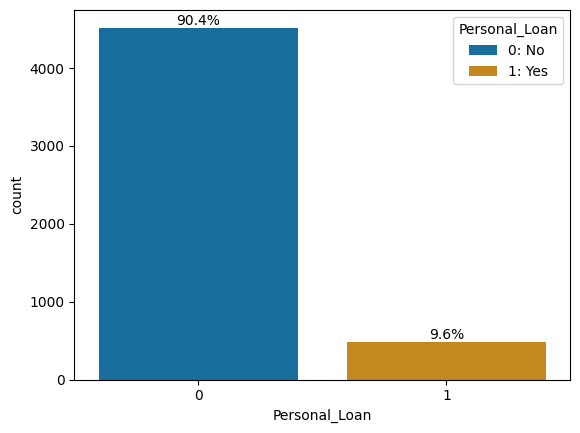

In [36]:
count_plot('Personal_Loan');

---
##### Observations (Personal Loan Column):
- 90.4% of this customer group did not accept the personal loan previously offered.
- 9.6% of customers in the data set had the person loan.
---

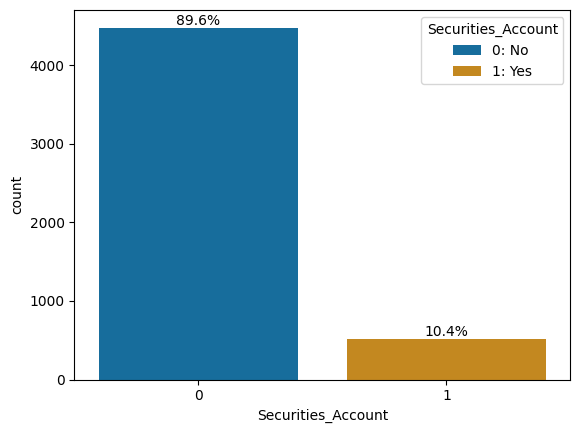

In [37]:
count_plot('Securities_Account');

---
##### Observations (Securities Account Column):
- 90% of this customer group do not have Securities Accounts.
---

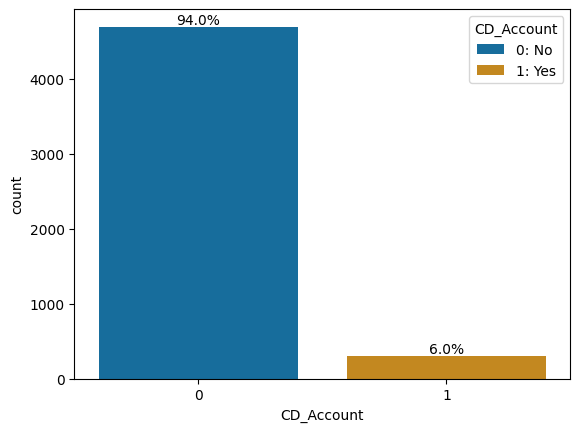

In [38]:
count_plot('CD_Account');

---
##### Observations (CD Account Column):
- 94% of this customer group did not have CD Accounts.
---

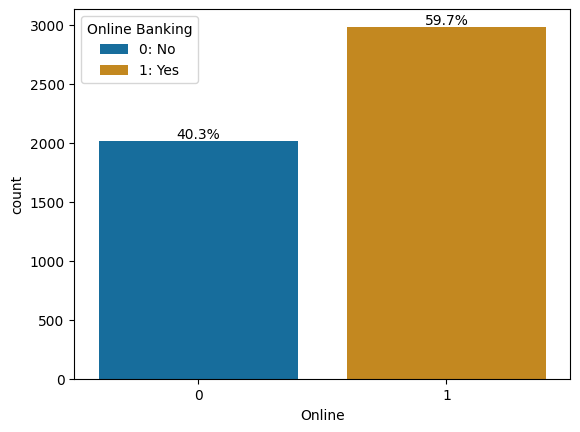

In [39]:
count_plot('Online');
plt.legend(title='Online Banking', loc='upper left', labels=['0: No', '1: Yes']);

---
##### Observations (Online Column):
- 60% of this customer group use online banking.
---

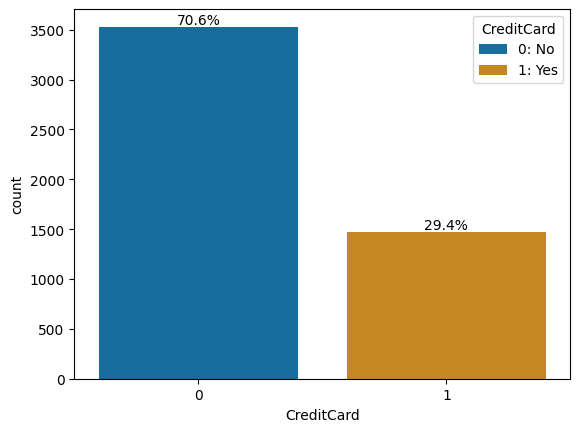

In [40]:
count_plot('CreditCard');

In [41]:
df[df.CreditCard == 1].shape

(1470, 14)

---
##### Observations (CrediCard Column):
- 29% of this group or 1470 customers have credit cards issued by other banks.
---

#### Multivariate Analysis

In [42]:
# Function to plot Stacked Barplot

def stacked_barplot(data, predictor, target):
    '''
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    '''
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    tab1['% of 0'] = round(tab1[0]/tab1['All']*100, 2)
    tab1['% of 1'] = round(tab1[1]/tab1['All']*100, 2)
    print(tab1)
    print('-' * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind='bar', stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc='lower left', frameon=False,
    )
    plt.legend(title=target, loc='upper left', bbox_to_anchor=(1, 1), labels=['0: No', '1: Yes'])
    plt.show()

In [43]:
# function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(8, 5))

    target_uniq = data[target].unique()

    axs[0, 0].set_title('Distribution of target for target=' + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color='teal',
        stat='density',
    )

    axs[0, 1].set_title('Distribution of target for target=' + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color='orange',
        stat='density',
    )

    axs[1, 0].set_title('Boxplot w.r.t target')
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette='gist_rainbow')

    axs[1, 1].set_title('Boxplot (without outliers) w.r.t target')
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette='gist_rainbow',
    )

    plt.tight_layout()
    plt.show()

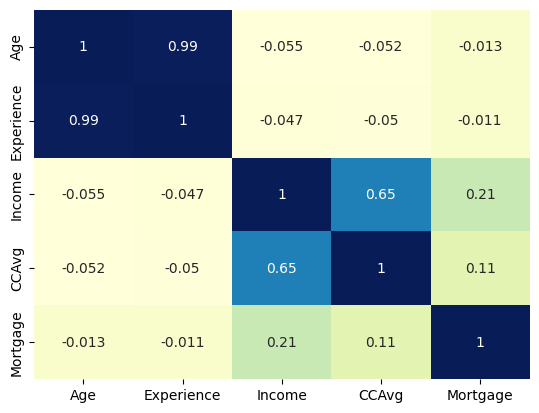

In [44]:
sns.heatmap(data=df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']].corr(), annot=True, cbar=False, cmap='YlGnBu');

---
##### Observations (Heatmap):
- Experience and Age are heavily positively correlated.
- CCAvg and Income are positively correlated.
---

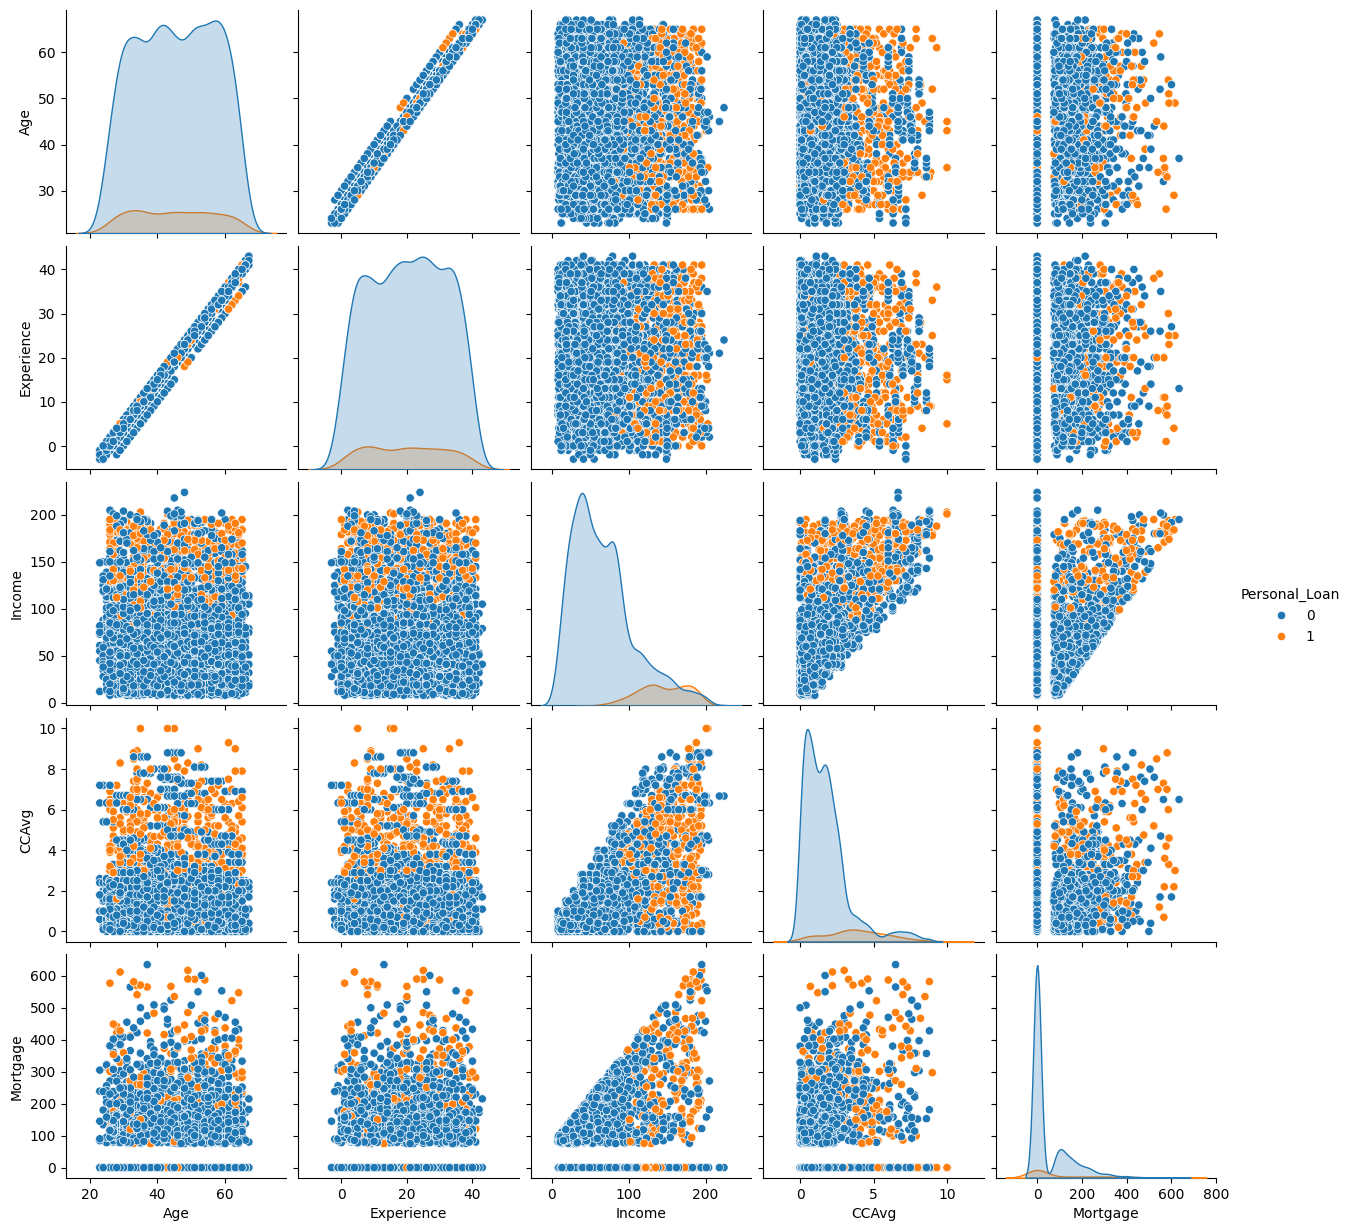

In [45]:
sns.pairplot(df, vars=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage'], hue='Personal_Loan');

---
##### Observations (Pairplot):
- People with Personal Loan have strong relations with a higher Income, CCAvg, and Mortgage.
- Income and Mortgage are positively correlated.
- Age and Experience have a linear correlation.
---

In [46]:
# Function to plot several boxplots horizontally
def box_plots(cols:list, feature: str): 
    plt.figure(figsize=(15,10))
    for i, var in enumerate(cols):
        plt.subplot(3, 5, i+1)
        sns.boxplot(x=df[feature], y=df[var], hue=df[feature], legend=False)
        plt.tight_layout()
        plt.title(var);    

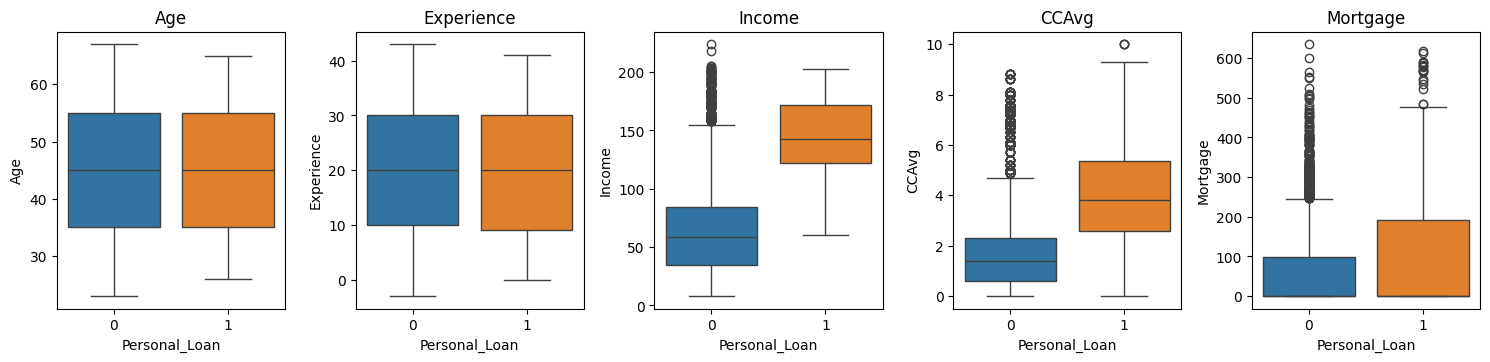

In [47]:
cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
box_plots(cols, 'Personal_Loan');

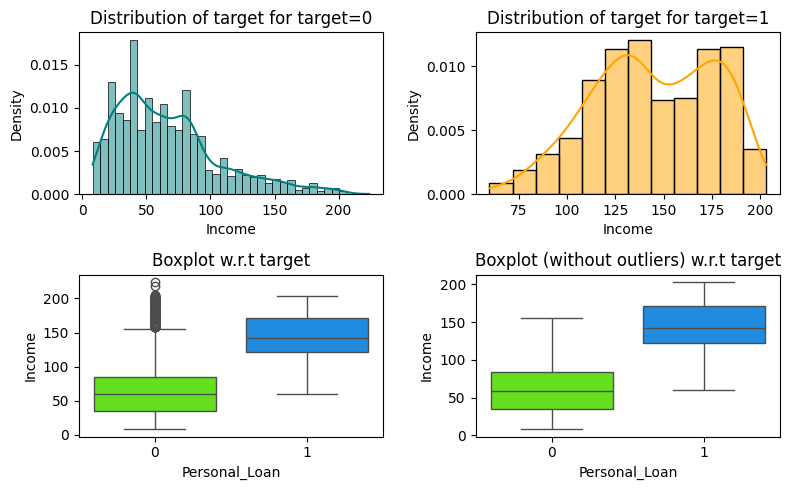

In [48]:
distribution_plot_wrt_target(df, 'Income', 'Personal_Loan')

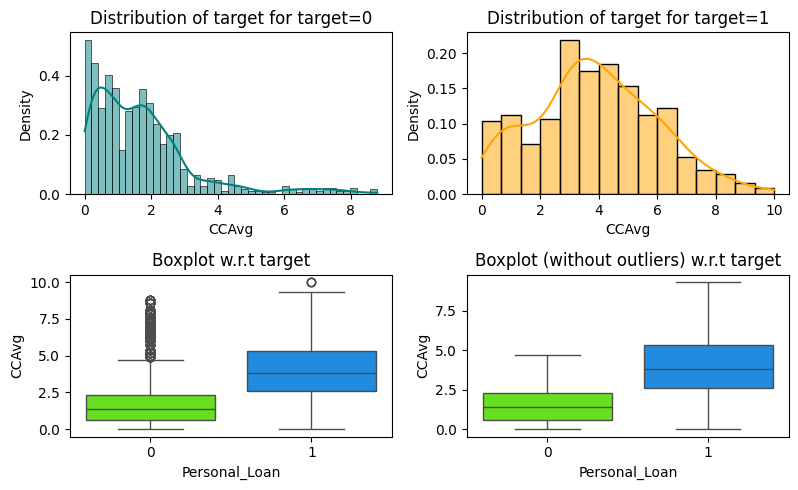

In [49]:
distribution_plot_wrt_target(df, 'CCAvg', 'Personal_Loan')

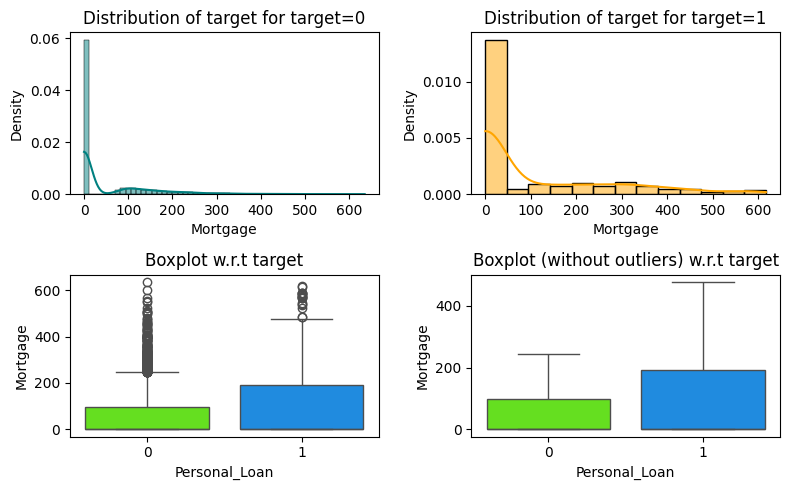

In [50]:
distribution_plot_wrt_target(df, 'Mortgage', 'Personal_Loan')

---
##### Observations (Personal_Loan vs Numerical Features):
- It seems that people with Personal Loan have higher incomes, spending more on credit card, and have a mortgage.
- Age and Experience features are highly correlated and likely will have similar impurity reduction.
- The average income for customers without Personal Loan is around 60k, and with Personal Loan is around 140k.
- Customers with Personal Loan have a distint higher level of income, CCAvg, and Mortgage.
---

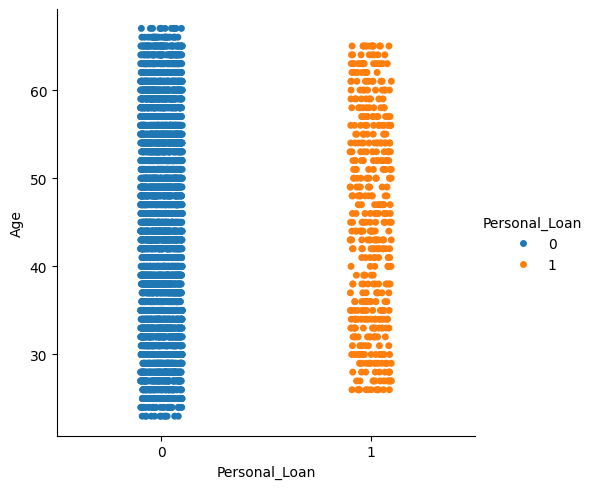

In [51]:
sns.catplot(data=df, x='Personal_Loan', y='Age', hue='Personal_Loan');

---
##### Observations (Age vs Personal_Loan):
- The average age of customers with or without Personal Loan is 45
- Age does not correlate much to the customer's interest in purchasing a loan.
---

Personal_Loan     0    1   All  % of 0  % of 1
Education                                     
All            4520  480  5000   90.40    9.60
3              1296  205  1501   86.34   13.66
2              1221  182  1403   87.03   12.97
1              2003   93  2096   95.56    4.44
------------------------------------------------------------------------------------------------------------------------


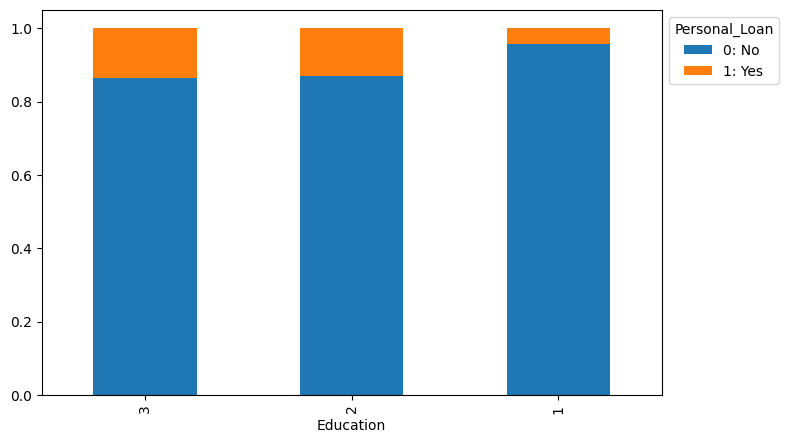

In [52]:
stacked_barplot(df, 'Education', 'Personal_Loan');

---
##### Observations (Education vs Personal_Loan):
- About 13% of group 2 (Graduate) and also 13% group 3 (Advanced/Professional) had the previous personal loan.
- Only about 4% of group 1 (Undergrad) had the personal loan.
---

Personal_Loan          0    1   All  % of 0  % of 1
Securities_Account                                 
All                 4520  480  5000   90.40    9.60
0                   4058  420  4478   90.62    9.38
1                    462   60   522   88.51   11.49
------------------------------------------------------------------------------------------------------------------------


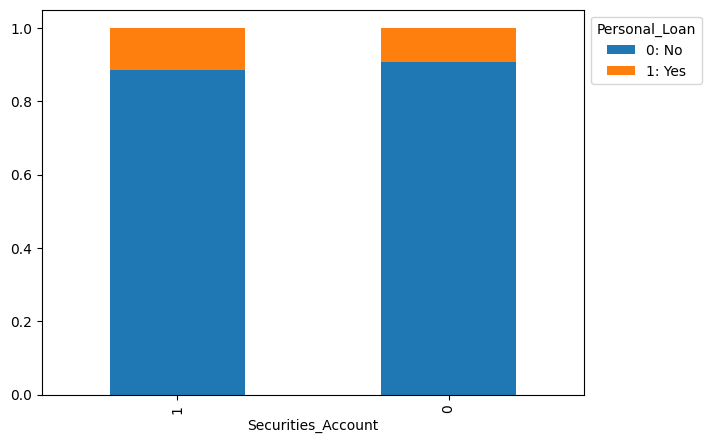

In [53]:
stacked_barplot(df, 'Securities_Account', 'Personal_Loan');

---
##### Observations (Securities_Account vs Personal_Loan):
- The percentage is similar for both groups. About 10% people with or without Securities Account have Personal Loan.
---

Personal_Loan     0    1   All  % of 0  % of 1
CD_Account                                    
All            4520  480  5000   90.40    9.60
0              4358  340  4698   92.76    7.24
1               162  140   302   53.64   46.36
------------------------------------------------------------------------------------------------------------------------


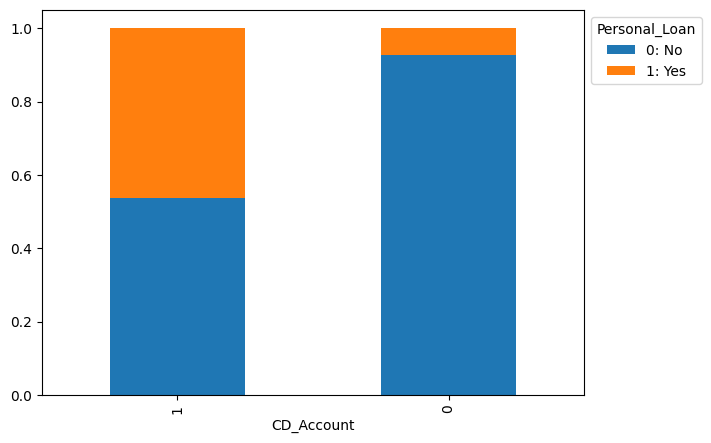

In [54]:
stacked_barplot(df, 'CD_Account', 'Personal_Loan');

---
##### Observations (CD_Account vs Personal_Loan):
- CD Account attribute is highly correlated with Personal Loan. About 46% of those who have CD Accounts also have Personal Loans.
---

Personal_Loan     0    1   All  % of 0  % of 1
Online                                        
All            4520  480  5000   90.40    9.60
1              2693  291  2984   90.25    9.75
0              1827  189  2016   90.62    9.38
------------------------------------------------------------------------------------------------------------------------


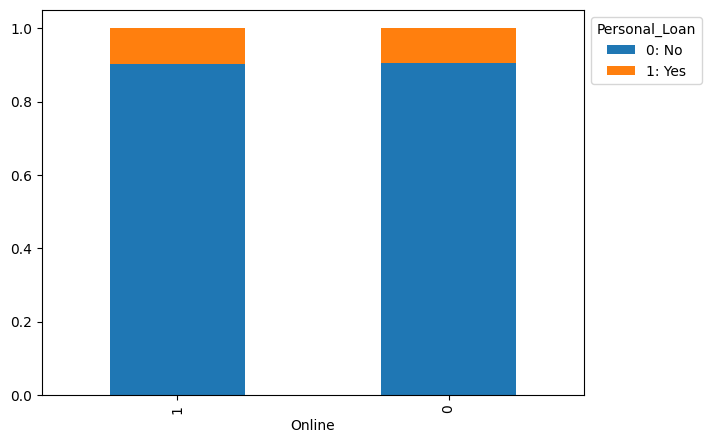

In [55]:
stacked_barplot(df, 'Online', 'Personal_Loan');

---
##### Observations (Online Banking vs Personal_Loan):
- The percentage is similar for both groups at about 10%. 
---

Personal_Loan     0    1   All  % of 0  % of 1
CreditCard                                    
All            4520  480  5000   90.40    9.60
0              3193  337  3530   90.45    9.55
1              1327  143  1470   90.27    9.73
------------------------------------------------------------------------------------------------------------------------


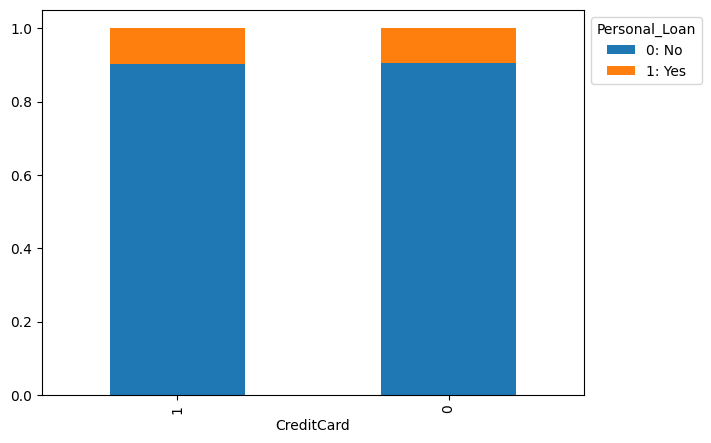

In [56]:
stacked_barplot(df, 'CreditCard', 'Personal_Loan');

---
##### Observations (CreditCard vs Personal_Loan):
- The percentage is similar for both groups at about 10%. 
---

In [57]:
df_top_10_zip = df[df['ZIPCode'].isin(df['ZIPCode'].value_counts().head(10).index)]

Personal_Loan    0   1  All  % of 0  % of 1
ZIPCode                                    
All            736  69  805   91.43    8.57
94720          150  19  169   88.76   11.24
94305          114  13  127   89.76   10.24
90095           63   8   71   88.73   11.27
95616          110   6  116   94.83    5.17
92037           49   5   54   90.74    9.26
91711           48   4   52   92.31    7.69
93106           53   4   57   92.98    7.02
93943           50   4   54   92.59    7.41
94025           48   4   52   92.31    7.69
91320           51   2   53   96.23    3.77
------------------------------------------------------------------------------------------------------------------------


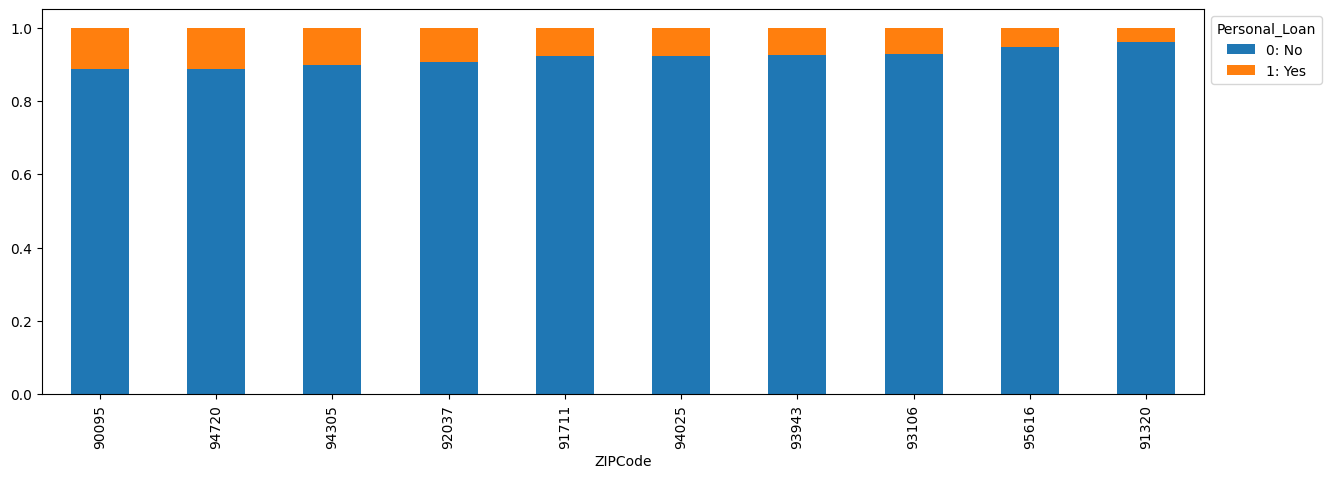

In [58]:
stacked_barplot(df_top_10_zip, 'ZIPCode', 'Personal_Loan');

---
##### Observations (ZIPCode vs Personal_Loan):
- The 2 zipcodes where people have high numbers of Personal Loans are 94720 and 94305. 
---

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### 1. Missing value treatment

In [59]:
# Correcting typos in the negative experience values
df['Experience'] = np.abs(df['Experience'])
df['Experience'].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, 34,  0, 38, 40, 33,  4, 42, 43], dtype=int64)

#### 2. Feature engineering 

In [60]:
# Converting the data type of categorical features to 'category'
# Will keep features with 0 and 1 as they are.
cat_cols = [
    'Education',
    'ZIPCode',
    'Family'
]
df[cat_cols] = df[cat_cols].astype('category') 

In [61]:
df.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                category
CCAvg                  float64
Education             category
Mortgage                 int64
Personal_Loan            int64
Securities_Account       int64
CD_Account               int64
Online                   int64
CreditCard               int64
dtype: object

#### 3. Outlier detection and treatment

Outliers Summary: 96 in Income, 324 in CCAvg, and 291 in Mortgage.

We can keep these outlier points because they seem consistent and continuous. 

#### 4. Preparing data for modeling

In [62]:
# dropping ID as it does not add values to the model
# dropping Experience as it has linear correlation with Age

X = df.drop(['Personal_Loan', 'ID', 'Experience'], axis=1)
y = df['Personal_Loan']

X = pd.get_dummies(X, columns=['Education', 'ZIPCode'], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

X.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_2,Education_3,ZIPCode_90007,ZIPCode_90009,ZIPCode_90011,ZIPCode_90016,ZIPCode_90018,ZIPCode_90019,ZIPCode_90024,ZIPCode_90025,ZIPCode_90027,ZIPCode_90028,ZIPCode_90029,ZIPCode_90032,ZIPCode_90033,ZIPCode_90034,ZIPCode_90035,ZIPCode_90036,ZIPCode_90037,ZIPCode_90041,ZIPCode_90044,ZIPCode_90045,ZIPCode_90048,ZIPCode_90049,ZIPCode_90057,ZIPCode_90058,ZIPCode_90059,ZIPCode_90064,ZIPCode_90065,ZIPCode_90066,ZIPCode_90068,ZIPCode_90071,ZIPCode_90073,ZIPCode_90086,ZIPCode_90089,ZIPCode_90095,ZIPCode_90210,ZIPCode_90212,ZIPCode_90230,ZIPCode_90232,ZIPCode_90245,ZIPCode_90250,ZIPCode_90254,ZIPCode_90266,ZIPCode_90272,ZIPCode_90274,ZIPCode_90275,ZIPCode_90277,ZIPCode_90280,ZIPCode_90291,ZIPCode_90304,ZIPCode_90401,ZIPCode_90404,ZIPCode_90405,ZIPCode_90502,ZIPCode_90503,ZIPCode_90504,ZIPCode_90505,ZIPCode_90509,ZIPCode_90601,ZIPCode_90623,ZIPCode_90630,ZIPCode_90638,ZIPCode_90639,ZIPCode_90640,ZIPCode_90650,ZIPCode_90717,ZIPCode_90720,ZIPCode_90740,ZIPCode_90745,ZIPCode_90747,ZIPCode_90755,ZIPCode_90813,ZIPCode_90840,ZIPCode_91006,ZIPCode_91007,ZIPCode_91016,ZIPCode_91024,ZIPCode_91030,ZIPCode_91040,ZIPCode_91101,ZIPCode_91103,ZIPCode_91105,ZIPCode_91107,ZIPCode_91109,ZIPCode_91116,ZIPCode_91125,ZIPCode_91129,ZIPCode_91203,ZIPCode_91207,ZIPCode_91301,ZIPCode_91302,ZIPCode_91304,ZIPCode_91311,ZIPCode_91320,ZIPCode_91326,ZIPCode_91330,ZIPCode_91335,ZIPCode_91342,ZIPCode_91343,ZIPCode_91345,ZIPCode_91355,ZIPCode_91360,ZIPCode_91361,ZIPCode_91365,ZIPCode_91367,ZIPCode_91380,ZIPCode_91401,ZIPCode_91423,ZIPCode_91604,ZIPCode_91605,ZIPCode_91614,ZIPCode_91706,ZIPCode_91709,ZIPCode_91710,ZIPCode_91711,ZIPCode_91730,ZIPCode_91741,ZIPCode_91745,ZIPCode_91754,ZIPCode_91763,ZIPCode_91765,ZIPCode_91768,ZIPCode_91770,ZIPCode_91773,ZIPCode_91775,ZIPCode_91784,ZIPCode_91791,ZIPCode_91801,ZIPCode_91902,ZIPCode_91910,ZIPCode_91911,ZIPCode_91941,ZIPCode_91942,ZIPCode_91950,ZIPCode_92007,ZIPCode_92008,ZIPCode_92009,ZIPCode_92024,ZIPCode_92028,ZIPCode_92029,ZIPCode_92037,ZIPCode_92038,ZIPCode_92054,ZIPCode_92056,ZIPCode_92064,ZIPCode_92068,ZIPCode_92069,ZIPCode_92084,ZIPCode_92093,ZIPCode_92096,ZIPCode_92101,ZIPCode_92103,ZIPCode_92104,ZIPCode_92106,ZIPCode_92109,ZIPCode_92110,ZIPCode_92115,ZIPCode_92116,ZIPCode_92120,ZIPCode_92121,ZIPCode_92122,ZIPCode_92123,ZIPCode_92124,ZIPCode_92126,ZIPCode_92129,ZIPCode_92130,ZIPCode_92131,ZIPCode_92152,ZIPCode_92154,ZIPCode_92161,ZIPCode_92173,ZIPCode_92177,ZIPCode_92182,ZIPCode_92192,ZIPCode_92220,ZIPCode_92251,ZIPCode_92325,ZIPCode_92333,ZIPCode_92346,ZIPCode_92350,ZIPCode_92354,ZIPCode_92373,ZIPCode_92374,ZIPCode_92399,ZIPCode_92407,ZIPCode_92507,ZIPCode_92518,ZIPCode_92521,ZIPCode_92606,ZIPCode_92612,ZIPCode_92614,ZIPCode_92624,ZIPCode_92626,ZIPCode_92630,ZIPCode_92634,ZIPCode_92646,ZIPCode_92647,ZIPCode_92648,ZIPCode_92653,ZIPCode_92660,ZIPCode_92661,ZIPCode_92672,ZIPCode_92673,ZIPCode_92675,ZIPCode_92677,ZIPCode_92691,ZIPCode_92692,ZIPCode_92694,ZIPCode_92697,ZIPCode_92703,ZIPCode_92704,ZIPCode_92705,ZIPCode_92709,ZIPCode_92717,ZIPCode_92735,ZIPCode_92780,ZIPCode_92806,ZIPCode_92807,ZIPCode_92821,ZIPCode_92831,ZIPCode_92833,ZIPCode_92834,ZIPCode_92835,ZIPCode_92843,ZIPCode_92866,ZIPCode_92867,ZIPCode_92868,ZIPCode_92870,ZIPCode_92886,ZIPCode_93003,ZIPCode_93009,ZIPCode_93010,ZIPCode_93014,ZIPCode_93022,ZIPCode_93023,ZIPCode_93033,ZIPCode_93063,ZIPCode_93065,ZIPCode_93077,ZIPCode_93101,ZIPCode_93105,ZIPCode_93106,ZIPCode_93107,ZIPCode_93108,ZIPCode_93109,ZIPCode_93111,ZIPCode_93117,ZIPCode_93118,ZIPCode_93302,ZIPCode_93305,ZIPCode_93311,ZIPCode_93401,ZIPCode_93403,ZIPCode_93407,ZIPCode_93437,ZIPCode_93460,ZIPCode_93524,ZIPCode_93555,ZIPCode_93561,ZIPCode_93611,ZIPCode_93657,ZIPCode_93711,ZIPCode_93720,ZIPCode_93727,ZIPCode_93907,ZIPCode_93933,ZIPCode_93940,ZIPCode_93943,ZIPCode_93950,ZIPCode_93955,ZIPCode_94002,ZIPCode_94005,ZIPCode_94010,ZIPCode_94015,ZIPCode_94019,ZIPCode_94022,ZIPCode_94024,ZIPCode_94025,ZIPCode_94028,ZI

In [63]:
X.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard', 'Education_2',
       ...
       'ZIPCode_95973', 'ZIPCode_96001', 'ZIPCode_96003', 'ZIPCode_96008',
       'ZIPCode_96064', 'ZIPCode_96091', 'ZIPCode_96094', 'ZIPCode_96145',
       'ZIPCode_96150', 'ZIPCode_96651'],
      dtype='object', length=477)

In [64]:
print('Shape of Training set : ', X_train.shape)
print('Shape of test set : ', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 477)
Shape of test set :  (1500, 477)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

In [65]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    '''
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {'Accuracy': acc, 'Recall': recall, 'Precision': precision, 'F1': f1,},
        index=[0],
    )

    return df_perf

In [66]:
# Function to plot confustion matrix with percentage
def confusion_matrix_sklearn(model, predictors, target):
    '''
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    '''
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + '\n{0:.2%}'.format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [67]:
# Function to plot Feature Importances
def plot_FI(model):
    Imp_Series = pd.DataFrame(model.feature_importances_, columns=['Imp'], index=X_train.columns) \
                .sort_values(by='Imp', ascending=False)
    print(Imp_Series)
    Imp_Series.loc[(Imp_Series != 0).any(axis=1)].head(10).plot(kind='barh', color='violet', align='center');

In [68]:
# Function to plot a tree and a text report.
def plot_tree_func(model, predictor):
    feature_names = list(predictor.columns)
    plt.figure(figsize=(10, 10))
    out = tree.plot_tree(
        model,
        feature_names=feature_names,
        filled=True,
        fontsize=9,
        node_ids=False,
        class_names=None,)
# below code will add arrows to the decision tree split if they are missing
    for o in out:
        arrow = o.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(1)
    plt.show()

# Text report showing the rules of a decision tree -
    print(tree.export_text(model, feature_names=feature_names, show_weights=True))

### Model Building

In [69]:
#creating the decission tree model
Dt_1 = DecisionTreeClassifier(criterion='gini', random_state=1, class_weight='balanced')

In [70]:
#fitting the training data
Dt_1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

In [71]:
#calculating the scores for training set
decision_tree_perf_train = model_performance_classification_sklearn(
    Dt_1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [72]:
#calculating the scores for test set
decision_tree_perf_test = model_performance_classification_sklearn(
    Dt_1, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.974667,0.872483,0.872483,0.872483


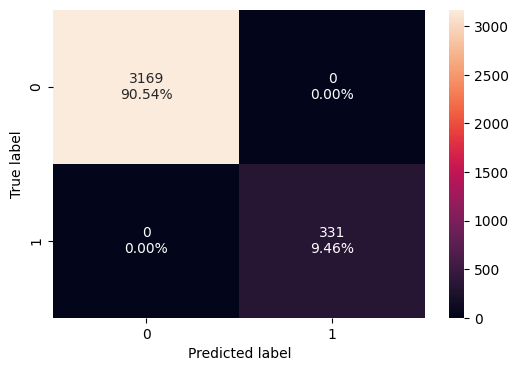

In [73]:
confusion_matrix_sklearn(Dt_1, X_train, y_train)

                    Imp
Income         0.636066
Education_2    0.136399
CCAvg          0.088955
Education_3    0.048025
Family         0.045668
...                 ...
ZIPCode_92110  0.000000
ZIPCode_92109  0.000000
ZIPCode_92106  0.000000
ZIPCode_92104  0.000000
ZIPCode_96651  0.000000

[477 rows x 1 columns]


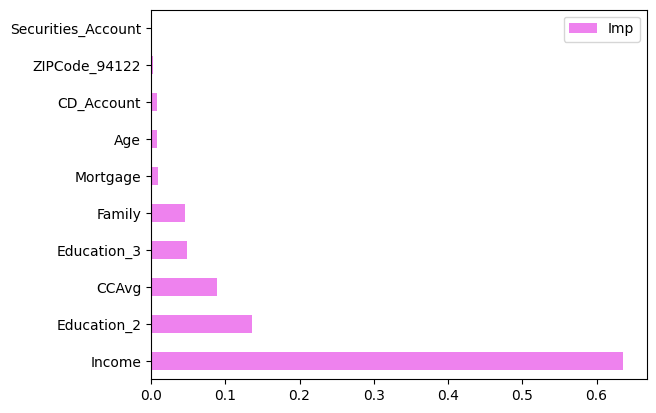

In [74]:
#Plotting the importance of features
plot_FI(Dt_1)

### Model Performance Improvement

#### Pre-Pruning with GridSearch method

In [75]:
# Choose the type of classifier.
Dt_2 = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    'max_depth': np.arange(6, 15),
    'min_samples_leaf': [1, 2, 5, 7, 10],
    'max_leaf_nodes': [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(Dt_2, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
Dt_2 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
Dt_2.fit(X_train, y_train) 

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

**Checking performance on training data**

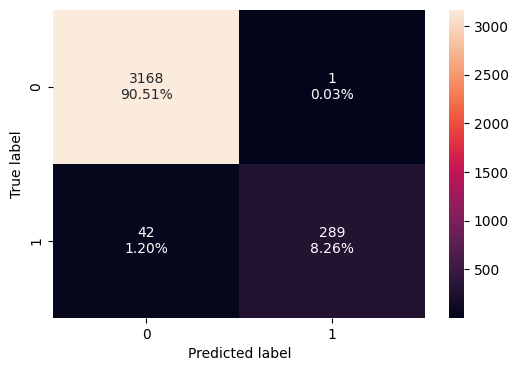

In [76]:
confusion_matrix_sklearn(Dt_2, X_train, y_train) 

In [77]:
#calculating the scores for training set
decision_tree_tune_perf_train = model_performance_classification_sklearn(Dt_2, X_train, y_train) 
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


                    Imp
Income         0.337681
Family         0.275581
Education_2    0.175687
Education_3    0.157286
CCAvg          0.042856
...                 ...
ZIPCode_92084  0.000000
ZIPCode_92069  0.000000
ZIPCode_92068  0.000000
ZIPCode_92064  0.000000
ZIPCode_96651  0.000000

[477 rows x 1 columns]


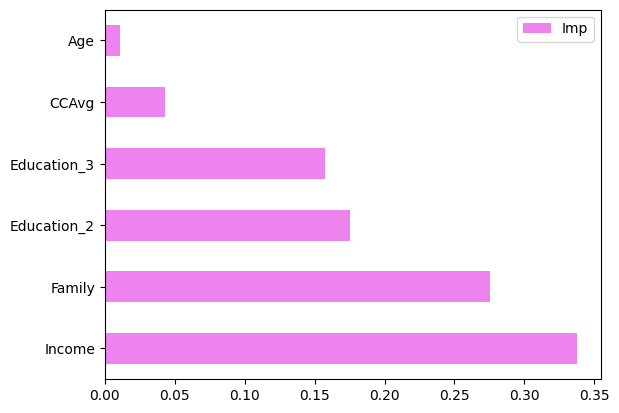

In [78]:
#Plotting the importance of features for the pre-prunning tree
plot_FI(Dt_2)

**Visualizing the Decision Tree**

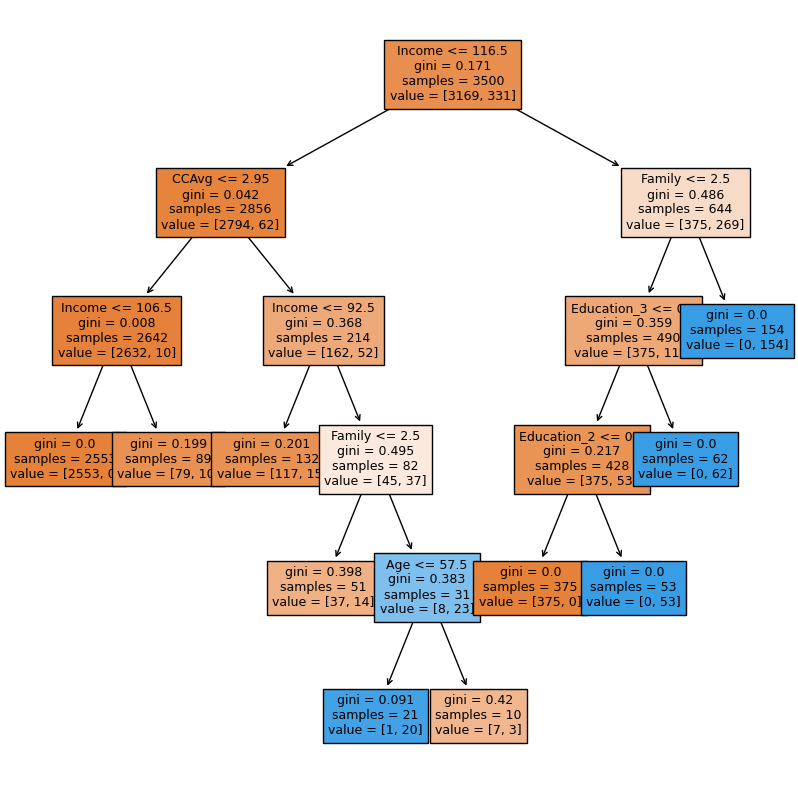

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [79]:
plot_tree_func(Dt_2, X_train)

**Checking performance on test data**

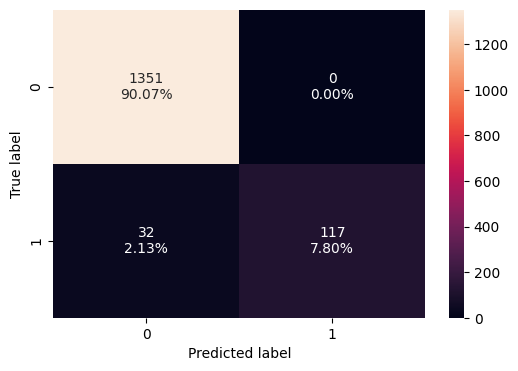

In [80]:
confusion_matrix_sklearn(Dt_2, X_test, y_test)  

In [81]:
#calculating the scores for test set
decision_tree_tune_perf_test = model_performance_classification_sklearn(Dt_2, X_test, y_test) 
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


#### Cost-Complexity Pruning

In [82]:
#Trying to find the best ccp_alphas value
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [83]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000276,0.000552
2,0.000279,0.002224
3,0.000381,0.002605
4,0.000476,0.003081
5,0.000500,0.003581
6,0.000513,0.007174
7,0.000527,0.007701
8,0.000544,0.008246
9,0.000545,0.009882


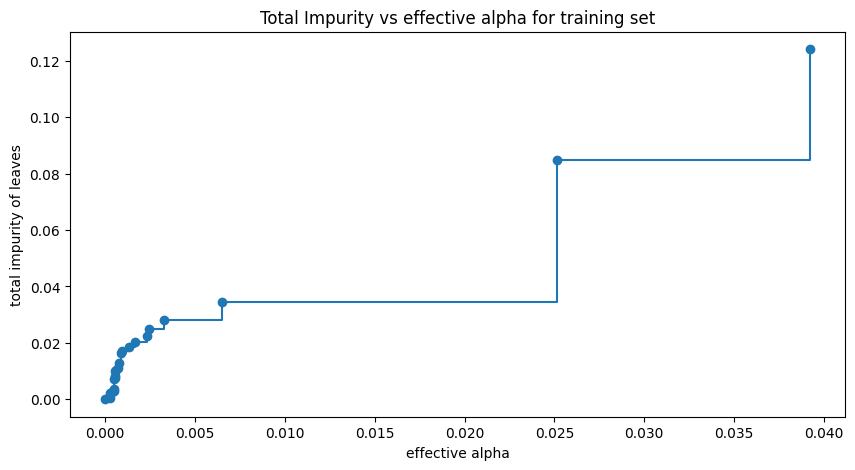

In [84]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('effective alpha')
ax.set_ylabel('total impurity of leaves')
ax.set_title('Total Impurity vs effective alpha for training set')
plt.show()

In [85]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     
    clfs.append(clf)
print(
    'Number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


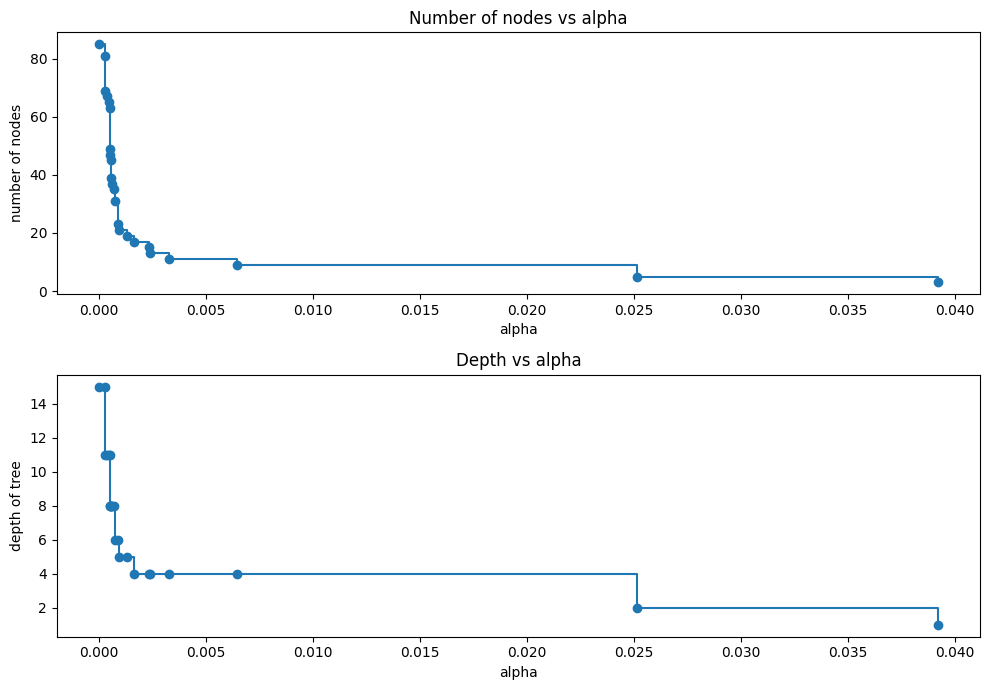

In [86]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle='steps-post')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title('Number of nodes vs alpha')
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle='steps-post')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('depth of tree')
ax[1].set_title('Depth vs alpha')
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [87]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

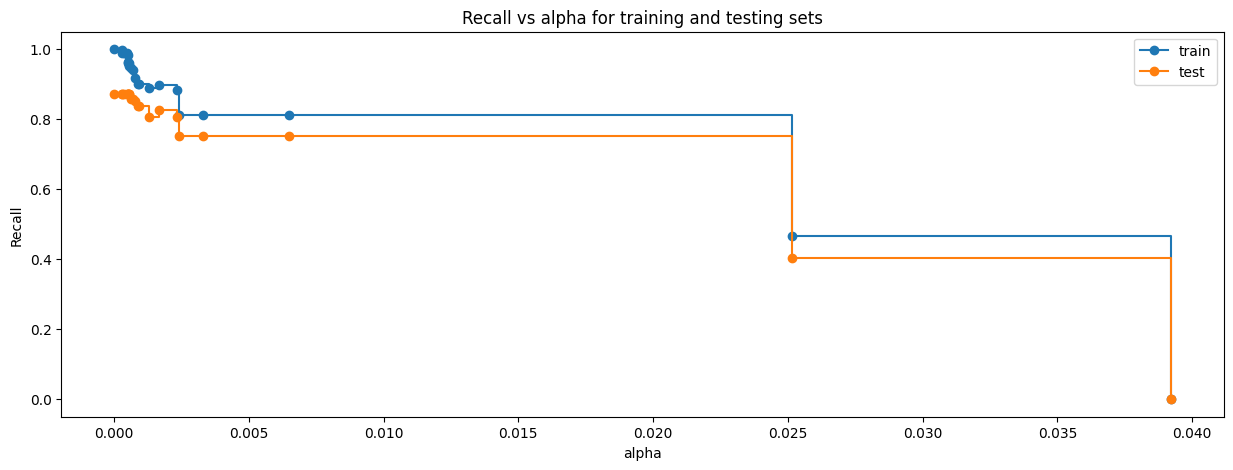

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, recall_test, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [112]:
recall_test

[0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.87248322147651,
 0.8590604026845637,
 0.8590604026845637,
 0.8523489932885906,
 0.8389261744966443,
 0.8389261744966443,
 0.8053691275167785,
 0.825503355704698,
 0.8053691275167785,
 0.7516778523489933,
 0.7516778523489933,
 0.7516778523489933,
 0.40268456375838924,
 0.0]

In [109]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Post-Pruning

In [90]:
Dt_3 = DecisionTreeClassifier(ccp_alpha=0.000381, max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1, class_weight='balanced') 
Dt_3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000381, class_weight='balanced', max_depth=6,
                       max_leaf_nodes=10, min_samples_leaf=10, random_state=1)

**Checking performance on training data**

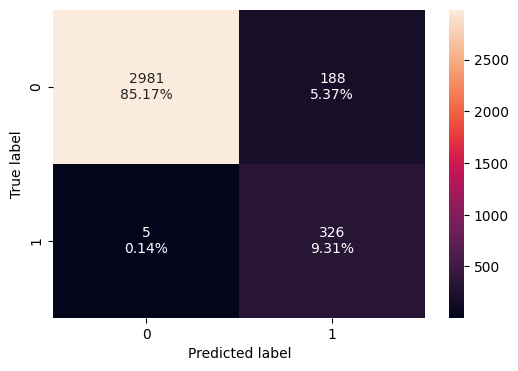

In [91]:
confusion_matrix_sklearn(Dt_3, X_train, y_train) 

In [92]:
#calculating the scores for training set
decision_tree_tune_post_train = model_performance_classification_sklearn(Dt_3, X_train, y_train) 
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.944857,0.984894,0.634241,0.771598


**Feature Importances**

                    Imp
Income         0.688365
Education_2    0.152372
CCAvg          0.063052
Education_3    0.053649
Family         0.042562
...                 ...
ZIPCode_92084  0.000000
ZIPCode_92069  0.000000
ZIPCode_92068  0.000000
ZIPCode_92064  0.000000
ZIPCode_96651  0.000000

[477 rows x 1 columns]


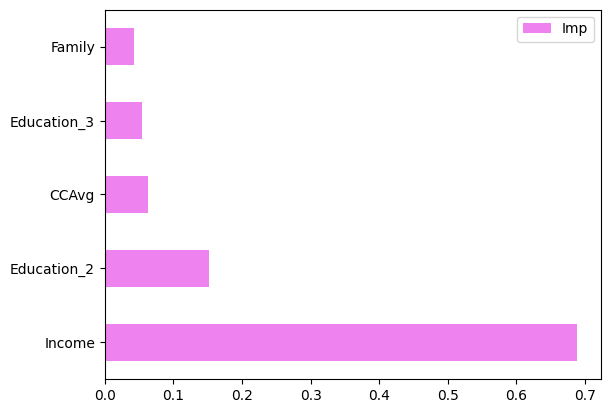

In [93]:
#Plotting the importance of features
plot_FI(Dt_3)

**Visualizing the Decision Tree**

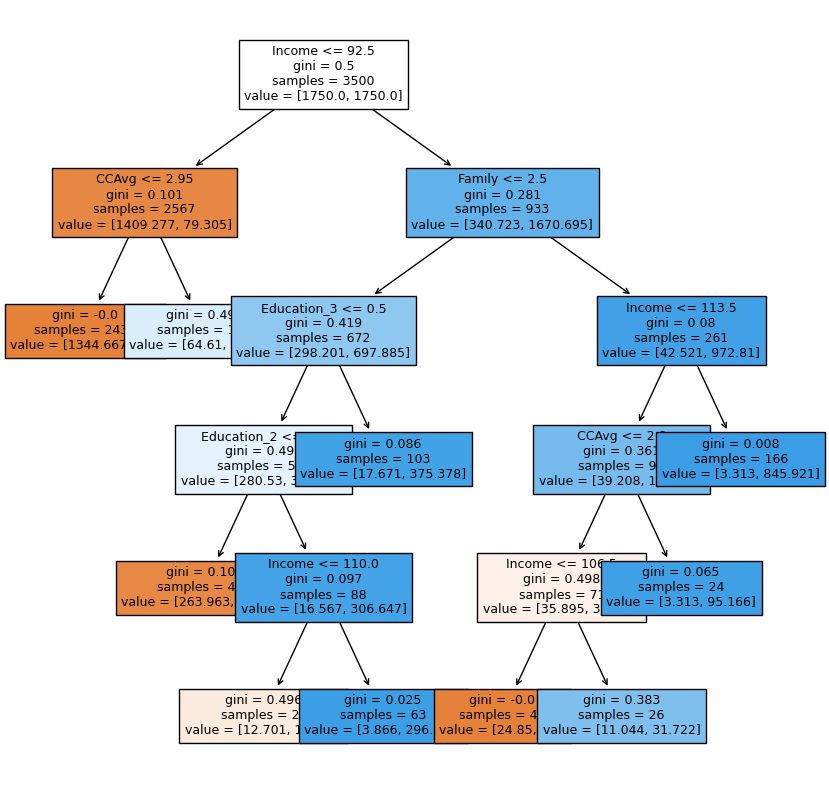

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1344.67, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [64.61, 79.31] class: 1
|--- Income >  92.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [263.96, 15.86] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 110.00
|   |   |   |   |   |--- weights: [12.70, 10.57] class: 0
|   |   |   |   |--- Income >  110.00
|   |   |   |   |   |--- weights: [3.87, 296.07] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [17.67, 375.38] class: 1
|   |--- Family >  2.50
|   |   |--- Income <= 113.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [24.85, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [11.04, 31.72] class: 1
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [3.31, 95.17] class:

In [94]:
plot_tree_func(Dt_3, X_train)

**Checking performance on test data**

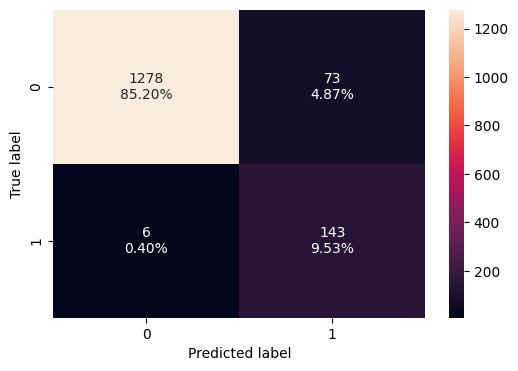

In [95]:
confusion_matrix_sklearn(Dt_3, X_test, y_test)  

In [96]:
#calculating the scores for test set
decision_tree_tune_post_test = model_performance_classification_sklearn(Dt_3, X_test, y_test) 
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.947333,0.959732,0.662037,0.783562


## Model Performance Comparison and Final Model Selection

In [97]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)', 'Decision Tree (Post-Pruning)']
print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.987714,0.944857
Recall,1.0,0.873112,0.984894
Precision,1.0,0.996552,0.634241
F1,1.0,0.930757,0.771598


In [98]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1, 
)
models_test_comp_df.columns = ['Decision Tree sklearn', 'Decision Tree (Pre-Pruning)', 'Decision Tree (Post-Pruning)']
print('Test performance comparison:')
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.974667,0.978667,0.947333
Recall,0.872483,0.785235,0.959732
Precision,0.872483,1.000000,0.662037
F1,0.872483,0.879699,0.783562


---
##### Observations on model building and prunning:
- This Decision Tree model is based on Gini criterion by default and class weight is set to balanced.
- The best ccp_alphas can be seen visually on the graph 'Recall vs alpha for training and testing sets' and estimated to be between 0.000 and 0.0005 or between 0.0002 and 0.0004
- The best ccp_alphas value found Cross Complexity is 0.000381.
- Noticed that the first tree model was overfitting where the accuracy score is 1.
- The pre-pruned tree (2nd tree) performs a bit better with the recall value on training set at 0.87 and recall value on test set at 0.78
- The post-pruned tree optimized the best with the recall value at 0.98 on training set and 0.95 on test set
---

## Actionable Insights and Business Recommendations


### Summary:
- All required libraries are imported such as pandas, numpy, sklearn, and etc.
- All missing data and outliers are identified and treated. Fortunately, there is no missing data and outliers can be left as is.
- Data preparation is done with feature engineering and one-hot encoding.
- The preliminary tree is built first
- Then the pre-pruned tree is built using GridSearch method
- The final model is developed using all combined parameters and cost complexity prunning ccp_alpha value. 

---
### Recommendations:
- From the Feature Importances of the Decision Tree model, it turns out that the following features play important roles in predicting whether a customer will accept a Personal Loan, based on the amount of reduction in the Gini impurity:
  1. Income (0.648699)
  2. Education_2 (0.139128)
  3. CCAvg (0.089532)
  4. Education_3 (0.048986)
  5. Family (0.046037)
- The marketing team should be considering the customer's profiles with these five catergories where the income is the top priority because it is the condition at the root of the decision tree.
- Based on the final model (post-pruned tree), a likely scenario for a customer accepting a loan offer is where the income is greater than 113.50k and the family size is 3 or greater. If a customer's income is less than 92.5k and the average spending on credit cards per month is less than 2.95k, then this customer will most likely ignore the loan offer, etc. 
   
---
    

